In [225]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [253]:
def add_metadata(metadata, features):
    names = [x.split("-") for x in features[0]]
    ids = [int(x[2].replace(".wav",'')) for x in names]
    ordered_metadata = pd.DataFrame()
    for i in ids:
        df = metadata[metadata.Recording_ID == i]
        ordered_metadata = ordered_metadata.append(df,ignore_index=True)
    return ordered_metadata.join(features)

In [156]:
features1 = pd.read_csv('C:/Users/Caleb Dilsavor/Desktop/bird/feature_vector1.csv',header = None)
metadata1 = pd.read_csv('C:/Users/Caleb Dilsavor/Desktop/bird/USA_Texas_A1.csv', encoding = "ISO-8859-1")

In [157]:
good_boi1 = add_metadata(metadata1,features1)

In [246]:
species = good_boi1.Genus + good_boi1.Specific_epithet
y = species.astype("category").cat.codes

In [215]:
X = good_boi1.iloc[:,18:]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = LogisticRegression(solver='lbfgs', multi_class = 'auto', max_iter=10000)
model.fit(X_train,y_train);
model.score(X_test,y_test)

0.6111111111111112

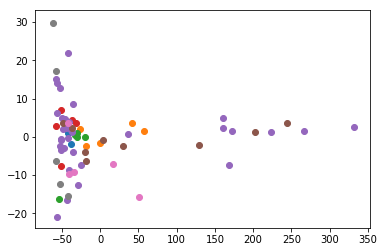

In [252]:
#2d PCA plotting
def _2d_plot(species, X): #len(species) = nrows(X)
    pca = PCA(n_components=2)
    pca.fit(X);
    df = pd.DataFrame()
    df['species'] = species
    everything = X.join(df)
    for i in everything.groupby('species').__iter__():
        tuples = pca.transform(i[1].drop('species',axis=1))
        xs = tuples[:,0]
        ys = tuples[:,1]
        plt.scatter(xs, ys);
    plt.show()

_2d_plot(species,X)

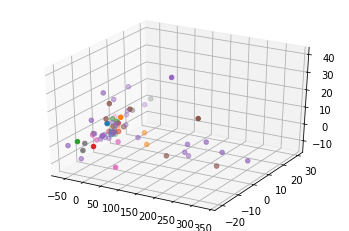

In [258]:
#3d PCA plotting
def _3d_plot(species, X): #len(species) = nrows(X)
    pca = PCA(n_components=3)
    pca.fit(X);
    df = pd.DataFrame()
    df['species'] = species
    everything = X.join(df)
    fig = plt.figure()
    ax = fig.add_subplot(111,projection = '3d')
    for i in everything.groupby('species').__iter__():
        tuples = pca.transform(i[1].drop('species',axis=1))
        xs = tuples[:,0]
        ys = tuples[:,1]
        zs = tuples[:,2]
        ax.scatter(xs, ys, zs);
    plt.show()
        
_3d_plot(species,X)

In [263]:
X1 = good_boi1.iloc[:,35:]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, random_state=1)
model = LogisticRegression(solver='lbfgs', multi_class = 'auto', max_iter=10000)
model.fit(X1_train,y1_train);
model.score(X1_test,y1_test)

0.4444444444444444

In [255]:
good_boi1.columns

Index([     'Recording_ID',             'Genus',  'Specific_epithet',
              'Subspecies',      'English_name',         'Recordist',
                 'Country',          'Locality',          'Latitude',
               'Longitude', 'Vocalization_type',        'Audio_file',
                 'License',               'Url',           'Quality',
                    'Time',              'Date',                   0,
                         1,                   2,                   3,
                         4,                   5,                   6,
                         7,                   8,                   9,
                        10,                  11,                  12,
                        13,                  14,                  15,
                        16,                  17,                  18,
                        19,                  20,                  21,
                        22,                  23,                  24,
                    

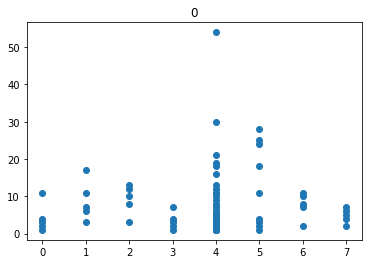

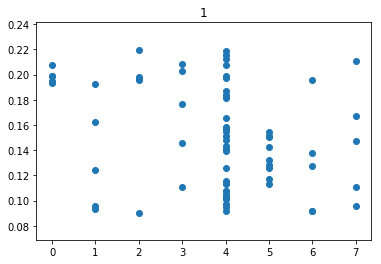

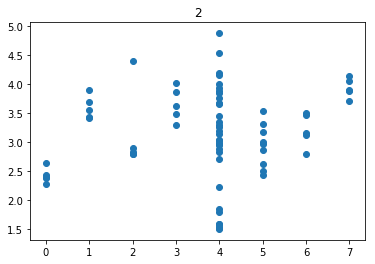

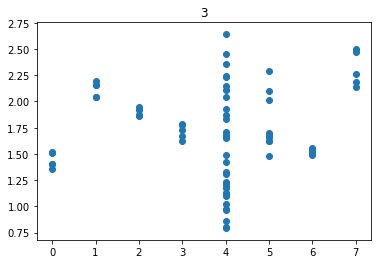

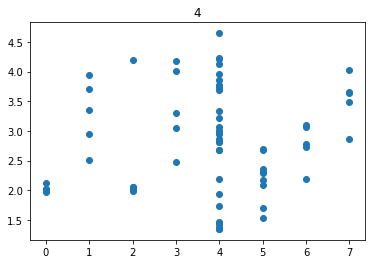

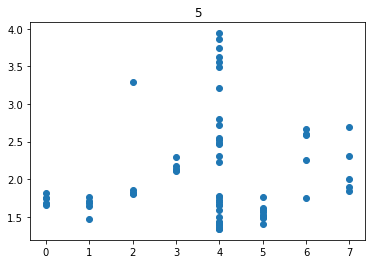

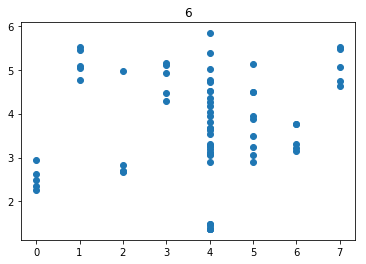

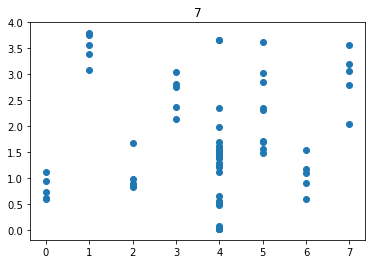

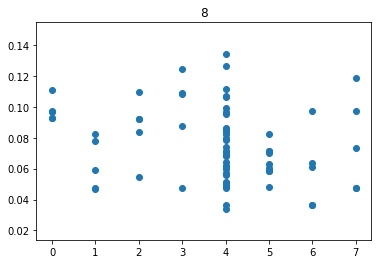

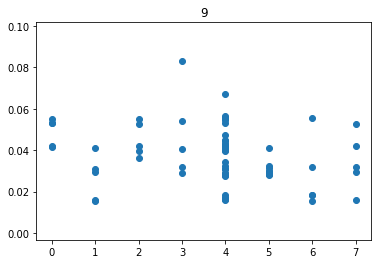

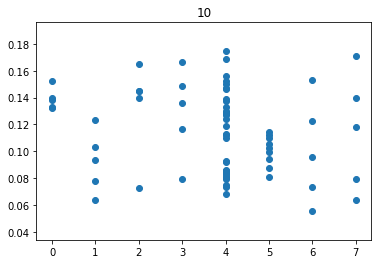

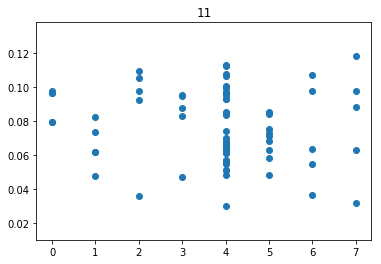

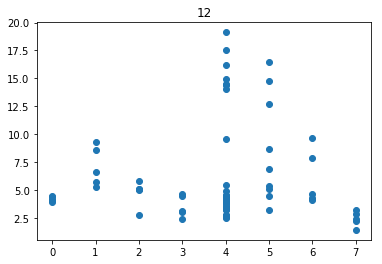

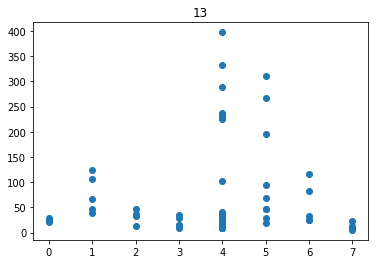

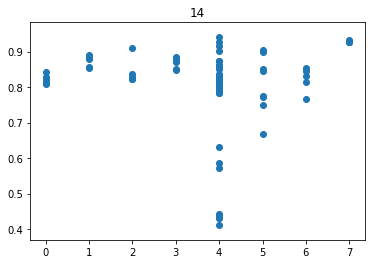

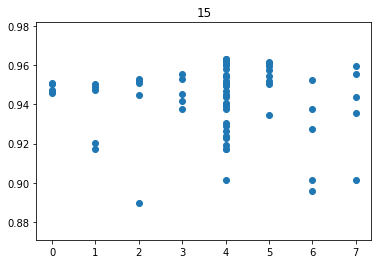

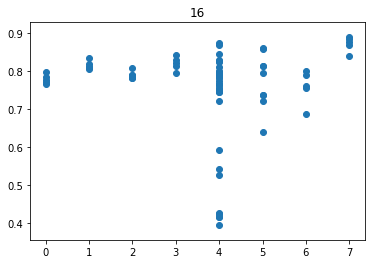

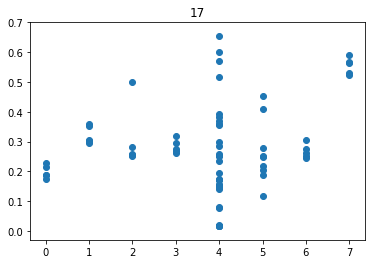

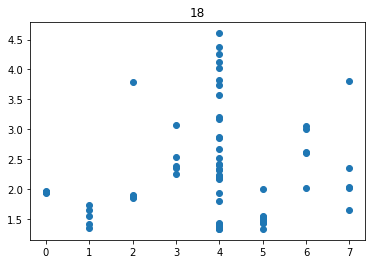

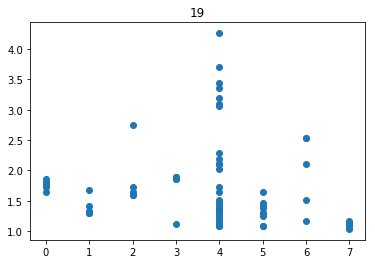

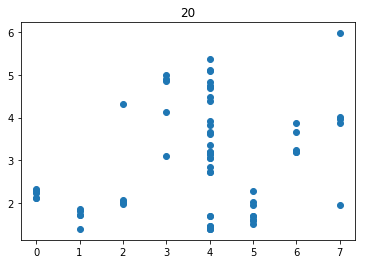

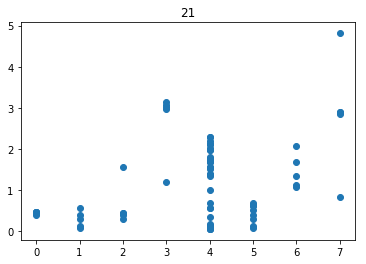

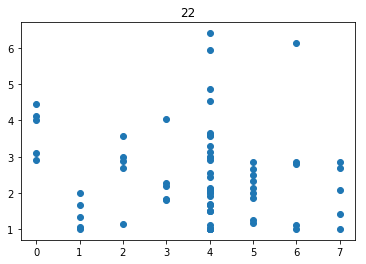

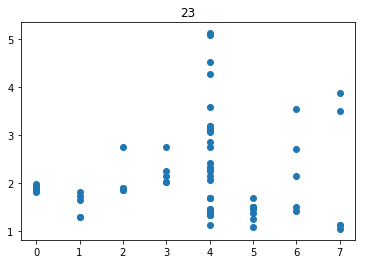

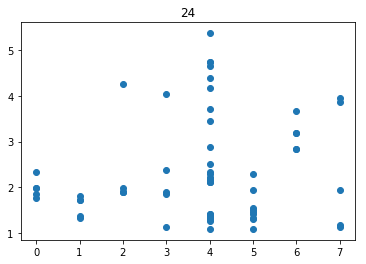

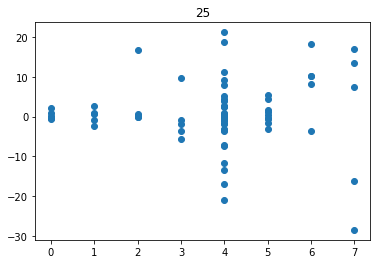

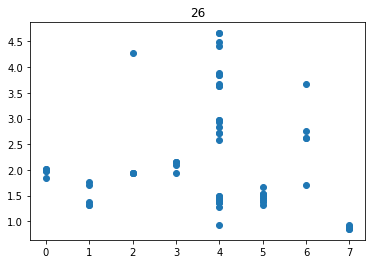

In [274]:
for i in range(0,27):
    plt.scatter(y,X.iloc[:,i])
    plt.title(i)
    plt.show()